In [1]:
# PICKLES LIBRARY

In [2]:
from spextra import SpecLibrary, Spextrum
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

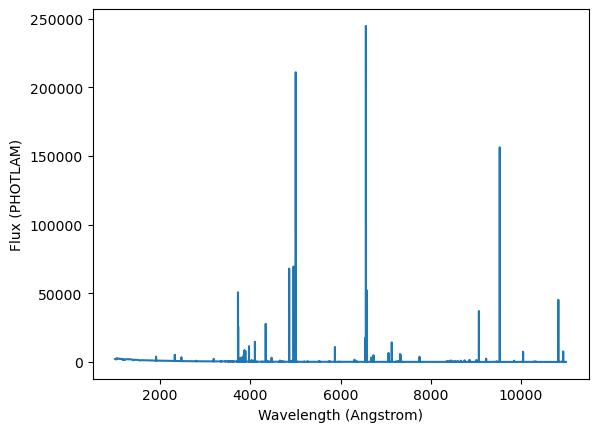

In [3]:
# RETRIEVE DATA FROM LIBRARY
lib = "nebulae"
spectra = "orion"

# NEEDS TO BE FORMATTED AS "[library]/[spectra]"
retrieve = lib + "/" + spectra
sp = Spextrum(retrieve)
sp.plot()

In [4]:
# RETRIEVE WAVELENGTH AND FLUX

wlA = np.array( sp.waveset )
flux = np.array( sp(wlA, flux_unit="PHOTLAM") )

print(wlA)
print(flux)

[ 1000.   1000.5  1001.  ... 10999.  10999.5 11000. ]
[2165.44542929 2180.17730053 2194.92299312 ...   24.33334137   24.33339475
   24.33350568]


In [5]:
def plotCurve(given_wl, given_flux):

    wlnm = given_wl
    P = given_flux

    # FOR TESTING PURPOSES
    filter_low = 2000
    filter_high = 5000

    p_max = np.max(P)
    wl_max = np.max(wlnm)

    plt.figure(figsize=(8, 6))
    plt.plot(wlnm, P,label='Stellar Spectrum',color='y')

    plt.fill_between(wlnm, P, color = 'yellow', alpha = 0.3,label = 'Stellar emission')

    plt.axvline(x=filter_low, color='r', linestyle='--', label='filter cut on')
    plt.axvline(x=filter_high, color='b', linestyle='--', label='filter cut off')

    plt.fill_betweenx(y=np.linspace(min(P), max(P)+1*10**14), x1=filter_low, x2=filter_high, color='lightblue', alpha=0.4, label='filter band pass')

    plt.title('Filtered Stellar Spectrum')
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Power Density (PHOTLAM)')
    plt.xlim(0,wl_max * 1.1)
    plt.ylim(0,p_max * 1.1)

    plt.legend()
    plt.grid(True)
    plt.show()

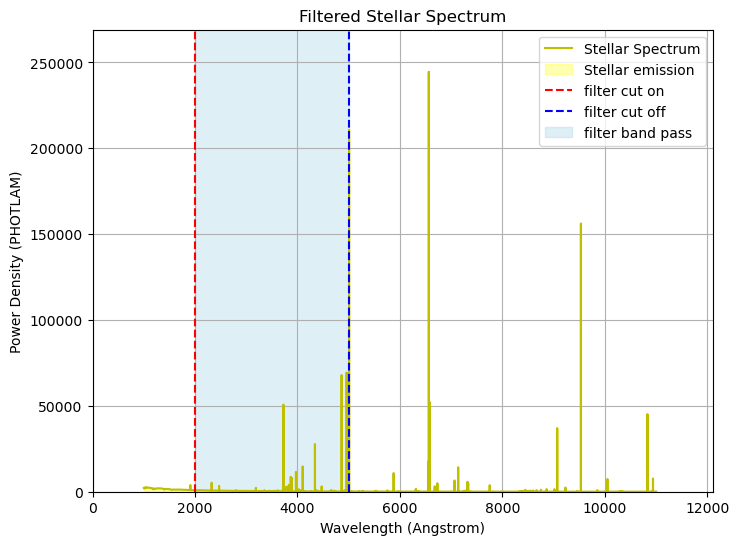

In [6]:
plotCurve(wlA, flux)

In [11]:
import spextra
from spextra import Passband

Passband.DEFAULT_FILTERS

{'U': 'etc/U',
 'B': 'etc/B',
 'V': 'etc/V',
 'R': 'etc/R',
 'I': 'etc/I',
 'Z': 'etc/Z',
 'Y': 'etc/Y',
 'J': 'etc/J',
 'H': 'etc/H',
 'K': 'etc/K',
 'Ks': '2MASS/2MASS.Ks',
 'L': 'etc/L',
 'M': 'etc/M',
 'N': 'etc/N',
 'Q': 'etc/Q',
 'u': 'SLOAN/SDSS.u',
 'g': 'SLOAN/SDSS.g',
 'r': 'SLOAN/SDSS.r',
 'i': 'SLOAN/SDSS.i',
 'z': 'SLOAN/SDSS.z',
 'HAlpha': 'Gemini/GMOS-N.Ha',
 'PaBeta': 'Gemini/NIRI.PaBeta-G0221',
 'BrGamma': 'Gemini/NIRI.BrG-G0218',
 'FUV': 'GALEX/GALEX.FUV',
 'NUV': 'GALEX/GALEX.NUV',
 'F435W': 'HST/ACS_WFC.F435W',
 'F475W': 'HST/ACS_WFC.F475W',
 'F606W': 'HST/ACS_WFC.F606W',
 'F775W': 'HST/ACS_WFC.F775W',
 'F814W': 'HST/ACS_WFC.F814W',
 'F850LP': 'HST/ACS_WFC.F850LP',
 'F105W': 'HST/WFC3_IR.F105W',
 'F110W': 'HST/WFC3_IR.F110W',
 'F125W': 'HST/WFC3_IR.F125W',
 'F140W': 'HST/WFC3_IR.F140W',
 'F160W': 'HST/WFC3_IR.F160W',
 'ch1': 'Spitzer/IRAC.I1',
 'ch2': 'Spitzer/IRAC.I2',
 'ch3': 'Spitzer/IRAC.I3',
 'ch4': 'Spitzer/IRAC.I4',
 'W1': 'WISE/WISE.W1',
 'W2': 'WISE/WISE.W2

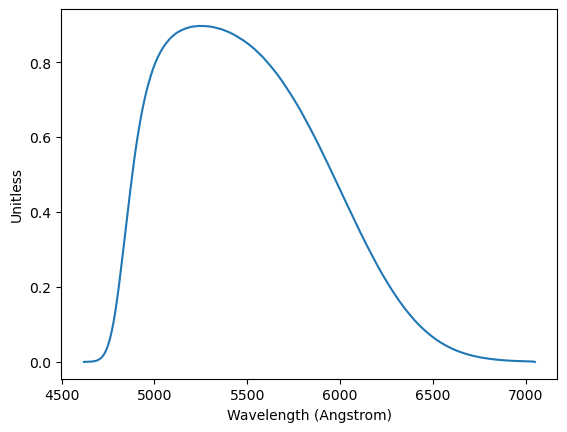

In [52]:
v = Passband('V')
v.equivwidth()
v.fwhm()
v.tpeak()
v.plot()

SHA256 hash of downloaded file: 235fb867b1c0c841add6d02353ab7ab9f526e5b68e82f158df3b4db3eec64b1e
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


458.09217431870775 Angstrom
0.97767925


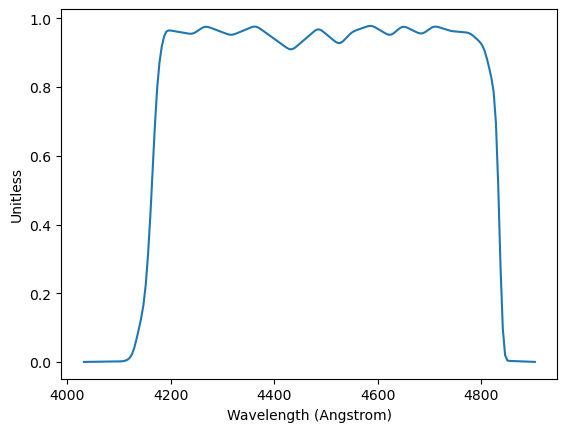

In [46]:
g = Passband('Gemini/DSSI.Blue_filter')
g.equivwidth()
print(g.fwhm())
print(g.tpeak())
g.plot()

In [ ]:
print(Passband(library="Gemini"))

ConstructorError: Filter name 'Gemini' must match the pattern 'library_name/file_name'.

0.98


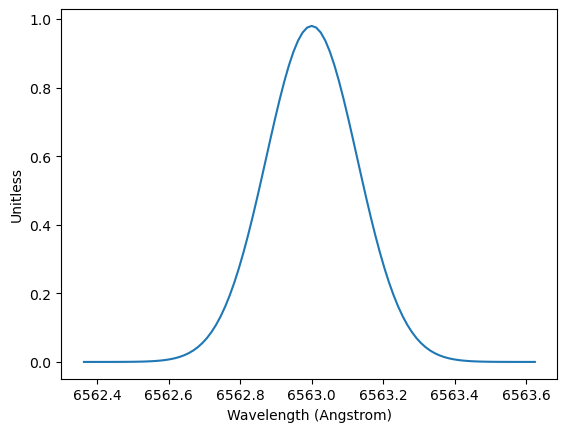

In [33]:
halpha = Passband.gaussian(6563, 0.3, 0.98)
print(halpha.tpeak())
halpha.plot()

56.666714535671076 Angstrom
0.898


/Users/markpirgalin/anaconda3/lib/python3.11/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


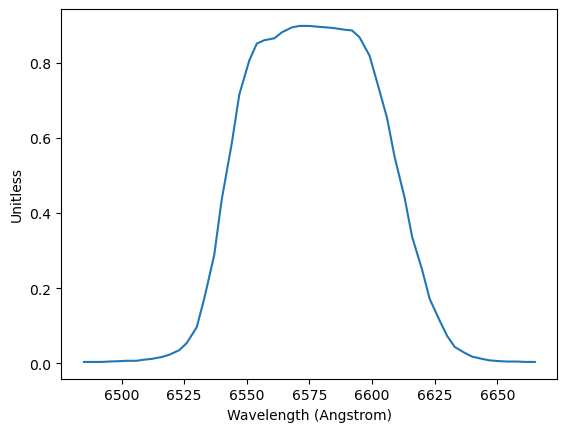

In [55]:
import synphot
ha = Passband.from_file("/Users/markpirgalin/Documents/UofM/Glenlea/Glenlea-ETC/Gemini.GMOS-N.Ha.xml")
# ha = synphot.SourceSpectrum.from_file("/Users/markpirgalin/Documents/UofM/Glenlea/Glenlea-ETC/Gemini.GMOS-N.Ha.xml")
ha.plot()
print(ha.fwhm())
print(ha.tpeak())

In [62]:
from spextra import spextra_database
libs = spextra_database["libraries"]

for lib in libs:
    print( SpecLibrary(lib) )
# lib = SpecLibrary("kc96")
# list(lib)

100%|█████████████████████████████████████████| 808/808 [00:00<00:00, 2.21MB/s]


Spectral Library 'ref': Reference library for objects
  spectral coverage: uv, vis, nir, mir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: vega, vegaLR, sirius, sun, sunHR
Spectral Library 'kc96': The Kinney-Calzetti Spectral Atlas of Galaxies
  spectral coverage: uv, vis
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: elliptical, bulge, s0, sa, sb, sc, starb1, starb2, starb3, starb4, starb5, starb6
Spectral Library 'pickles': Pickles Stellar Spectral Flux Library
  spectral coverage: uv, vis, nir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: o5v, o8iii, o9v, b0i, b0v, b12iii, b1i, b1v, b2ii, b2iv, b3i, b3iii, b3v, b57v, b5i, b5ii, b5iii, b6iv, b8i, b8v, b9iii, b9v, a0i, a0iii, a0iv, a0v, a2i, a2v, a3iii, a3v, a47iv, a5iii, a5v, a7iii, a7v, f02iv, f0i, f0ii, f0iii, f0v, f2ii, f2iii, f2v, f5i, f5iii, f5iv, f5v, f6v, f8i, f8iv, f8v, rf6v, rf8v, wf5v, wf8v, g0i, g0iii, g0iv, g0v, g2i, g2iv, g2v, g5i, g5ii, g5iii, g5iv, g5v, g8i, g8iii, g8iv, g8v, rg0v, rg5iii, rg5v, wg0

100%|█████████████████████████████████████| 3.20k/3.20k [00:00<00:00, 4.21MB/s]


Spectral Library 'dobos': A High Resolution Atlas of Composite SDSS Galaxy Spectra
  spectral coverage: uv, vis
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: BG, G, GG, h_BG, h_G, h_GG, hh_BG, hh_G, hh_GG, hh_RG, h_RG, l_BG, l_G, l_GG, l_RG, p_BG, p_G, p_GG, p_RG, RED0, RED1, RED2, RED3, RED4, RG, s_BG, SF1, SF2, SF3, SF4, s_G, s_GG, s_RG, t_BG, t_G, t_GG, t_RG


100%|█████████████████████████████████████| 7.36k/7.36k [00:00<00:00, 6.06MB/s]


Spectral Library 'irtf': The IRTF Spectral Library
  spectral coverage: nir, mir
  wave_unit: um
  flux_unit: W / (um m2)
  Templates: C7, C-J4, C-J5, C-N4.5C, C-N4C23, C-N5C26, C-R2, F0Ia, F0Ib, F0II, F0IIIa, F0III-IVn, F0IV, F0V, F1II, F1V, F2-F5Ib, F2Ib, F2III, F2V, F3V, F4III, F4V, F5.5III, F5Ib-G1Ib, F5III, F5II-III, F5V, F6III-IV, F6IV, F6V, F7II, F7III, F7V, F8.5IV-V, F8Ia, F8Ib, F8III, F8IV, F8V, F9.5V, F9IIIa, F9V, wF9V, G0Ib-II, G0V, G1.5V, G1Ib, G1III, G1II, G1-V, G1V, G2Ib, G2II, G2IV, G2V, G3Ib-II, G3II, G3IIIb, G3Va, G4Ia, G4III, G4O-Ia, G4V, G5Ib, G5IIIa, G5IIICN, G5V, G6.5V, G6IbH, G6Ib-IIa, G6IIb, G6III, G7.5IIIa, G7Ia, G7II, G7IIIa, G7IV, G8Ib, G8IIIBa1, G8IIIFe-1, G8IIIFe-5, G8V, G9IICN1H, G9III, K0.5IIb, K0.5IIICN1, K0Ia, K0Ib, K0II, K0III, K0V, K1.5IIIlines, K1.5IIIflux, K1Ia-Iab, K1-IIIb1, K1-IIIFe, K1III, K1IVa, K1IV, K1V, K2.5II, K2IIIFe, K2III, K2O-Ia, K2V, K3.5IIIb, K3Iab-Ib, K3+IIIFe05, K3IIIFe1, K3III, K3II-III, K3V, K4Ib, K4Ib-II, K4-III, K4V, K5.5III, K5Ib

100%|█████████████████████████████████████| 2.19k/2.19k [00:00<00:00, 3.41MB/s]


Spectral Library 'agn': THE AGN ATLAS
  spectral coverage: uv, vis, nir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: liner, ngc1068, qso, seyfert1, seyfert2
Spectral Library 'nebulae': THE GALACTIC EMISSION LINE OBJECT ATLAS
  spectral coverage: uv, vis, nir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: orion, pn
Spectral Library 'brown': An Atlas of Galaxy Spectral Energy Distributions from the Ultraviolet to the Mid-infrared
  spectral coverage: uv, vis, nir, mir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: Arp256N, Arp256S, NGC0337, CGCG436-030, NGC0474, NGC0520, NGC0584, NGC0628, NGC0660, IIIZw035, NGC0695, NGC0750, NGC0855, NGC1068, Arp118, NGC1144, NGC1275, NGC1614, NGC2388, NGC2403, NGC2537, NGC2623, IRAS08572+3915, UGC04881, NGC2798, UGCA166, UGC05101, NGC3049, NGC3079, UGCA208, NGC3190, NGC3198, NGC3265, Mrk33, NGC3310, NGC3351, NGC3379, UGCA219, NGC3521, NGC3627, IC0691, NGC3690, NGC3773, Mrk1450, UGC06665, NGC3870, UM461, UGC06850, NGC3938, NGC4088, NG

100%|█████████████████████████████████████| 2.23k/2.23k [00:00<00:00, 1.85MB/s]


Spectral Library 'kurucz': The 1993 Kurucz Stellar Atmospheres Atlas (excerpt)
  spectral coverage: uv, vis, nir, mir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: o3v, o5v, o6v, o8v, b0v, b3v, b5v, b8v, a0v, a5v, f0v, f5v, g0v, g2v, k0v, k5v, m0v, m2v, m5v, b0iii, b5iii, g0iii, g5iii, k0iii, k5iii, m0iii, o5i, o6i, o8i, boi, b5i, aoi, a5i, f0i, f5i, g0i, g5i, k0i, k5i, m0i, m2i


100%|█████████████████████████████████████| 1.03k/1.03k [00:00<00:00, 1.66MB/s]


Spectral Library 'sne': Supernova spectral library
  spectral coverage: uv, vis, nir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: sn1a, sn1b, sn1c, sn2l, sn2p, sn2n, hyper, pop3_3d, pop3_15d


100%|█████████████████████████████████████| 1.98k/1.98k [00:00<00:00, 3.86MB/s]


Spectral Library 'moehler': Flux calibration of medium-resolution spectra from 300 nm to 2500 nm
  spectral coverage: uv, vis, nir
  wave_unit: nm
  flux_unit: 10 mW / (nm m2)
  Templates: eg274, feige110, gd153, gd71, l97-3, ltt3218, ltt7987


100%|█████████████████████████████████████| 1.36k/1.36k [00:00<00:00, 2.50MB/s]


Spectral Library 'madden': High-Resolution Spectra of Habitable Zone Planets
  spectral coverage: vis, nir, mir
  wave_unit: um
  flux_unit: W / (um m2)
  Templates: example


100%|█████████████████████████████████████| 2.27k/2.27k [00:00<00:00, 4.13MB/s]


Spectral Library 'bosz/hr': BOSZ Stellar Atmosphere Grid (subset) - High Resolution
  spectral coverage: uv, vis, nir, mir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: o8v, b0v, b3v, b5v, b8v, a0v, a5v, f0v, f5v, g0v, g2v, k0v, k5v, m0v, m2v, b0iii, b5iii, g0iii, g5iii, k0iii, k5iii, m0iii, bOi, aOi, a5i, f0i, f5i, g0i, g5i, k0i, k5i, m2i


100%|█████████████████████████████████████| 2.27k/2.27k [00:00<00:00, 3.44MB/s]


Spectral Library 'bosz/mr': BOSZ Stellar Atmosphere Grid (subset) - Medium Resolution
  spectral coverage: uv, vis, nir, mir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: o8v, b0v, b3v, b5v, b8v, a0v, a5v, f0v, f5v, g0v, g2v, k0v, k5v, m0v, m2v, b0iii, b5iii, g0iii, g5iii, k0iii, k5iii, m0iii, bOi, aOi, a5i, f0i, f5i, g0i, g5i, k0i, k5i, m2i


100%|█████████████████████████████████████| 2.26k/2.26k [00:00<00:00, 3.47MB/s]


Spectral Library 'bosz/lr': BOSZ Stellar Atmosphere Grid (subset) - Low Resolution
  spectral coverage: uv, vis, nir, mir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: o8v, b0v, b3v, b5v, b8v, a0v, a5v, f0v, f5v, g0v, g2v, k0v, k5v, m0v, m2v, b0iii, b5iii, g0iii, g5iii, k0iii, k5iii, m0iii, bOi, aOi, a5i, f0i, f5i, g0i, g5i, k0i, k5i, m2i


100%|█████████████████████████████████████| 1.22k/1.22k [00:00<00:00, 2.09MB/s]


Spectral Library 'assef': Low Resolution Spectral Templates for AGN and Galaxies from 0.03 to 30um
  spectral coverage: uv, vis, nir, mir
  wave_unit: um
  flux_unit: erg / (Hz s cm2)
  Templates: agn, agn2, ellip, spiral, irr
Spectral Library 'sky': Paranal Night Sky Spectra
  spectral coverage: uv, vis, nir, mir
  wave_unit: Angstrom
  flux_unit: PHOTLAM
  Templates: HR, MR, LR, vLR


100%|█████████████████████████████████████████| 547/547 [00:00<00:00, 1.14MB/s]


Spectral Library 'shapley': Rest-Frame Ultraviolet Spectra of z ∼ 3 Lyman Break Galaxies
  spectral coverage: uv
  wave_unit: Angstrom
  flux_unit: FNU
  Templates: lyb


100%|█████████████████████████████████████| 1.32k/1.32k [00:00<00:00, 2.55MB/s]


Spectral Library 'etc/kinney': The Kinney-Calzetti Spectral Atlas of Galaxies (ESO ETC version)
  spectral coverage: uv, vis, nir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: ell, bulge, s0, sa, sb, sc, sb1, sb2, sb3, sb4, sb5, sb6


100%|█████████████████████████████████████| 1.02k/1.02k [00:00<00:00, 1.82MB/s]


Spectral Library 'etc/kurucz': The 1993 Kurucz Stellar Atmospheres Atlas ESO ETC version
  spectral coverage: uv, vis, nir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: o5v, b1v, b3v, b5v, b8v, a1v, a3v, a5v, f0i, f0v, f2v, f5v, f8v, g2v, g5i, g5v, g8v, k7v, m2v, m4v, m6v


100%|█████████████████████████████████████| 3.17k/3.17k [00:00<00:00, 6.53MB/s]


Spectral Library 'etc/marcs/p': MARCS stellar library (Plane Parallel) ESO ETC version
  spectral coverage: uv, vis, nir, mir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: t4000:z+0.00, t4000:z+0.50, t4000:z-1.00, t4000:z+1.00, t4000:z-2.00, t4500:z+0.00, t4500:z+0.50, t4500:z-1.00, t4500:z+1.00, t4500:z-2.00, t4500:z-4.00, t5000:z+0.00, t5000:z+0.50, t5000:z-1.00, t5000:z+1.00, t5000:z-2.00, t5000:z-4.00, t5500:z+0.00, t5500:z+0.50, t5500:z-1.00, t5500:z+1.00, t5500:z-2.00, t5500:z-4.00, t6000:z+0.00, t6000:z+0.50, t6000:z-1.00, t6000:z+1.00, t6000:z-2.00, t6000:z-4.00, t6250:z-3.00, t6250:z-4.00, t6250:z-5.00, t6500:z+0.00, t6500:z+0.50, t6500:z-1.00, t6500:z+1.00, t6500:z-2.00, t6500:z-4.00, t7000:z+0.00, t7000:z+0.50, t7000:z-1.00, t7000:z-2.00, t7000:z-4.00, t7500:z+0.00, t7500:z+0.50, t7500:z-1.00, t7500:z+1.00, t8000:z+0.00, t8000:z+0.50, t8000:z-1.00, t8000:z+1.00, t8000:z-2.00, t8000:z-4.00


100%|█████████████████████████████████████| 8.07k/8.07k [00:00<00:00, 16.6MB/s]


Spectral Library 'etc/marcs/s': MARCS stellar library (spherical geometry) ESO ETC version
  spectral coverage: uv, vis, nir, mir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: t4000:g+0.0:m1.0:z+0.00, t4000:g+0.0:m1.0:z-1.00, t4000:g+0.0:m5.0:z-1.00, t4000:g-0.5:m1.0:z+0.00, t4000:g+1.0:m1.0:z+0.00, t4000:g+1.0:m1.0:z-1.00, t4000:g+1.0:m1.0:z-2.00, t4000:g+1.0:m5.0:z+0.00, t4000:g+1.0:m5.0:z-1.00, t4000:g+1.0:m5.0:z-2.00, t4000:g+1.0:m5.0:z-4.00, t4000:g+2.0:m1.0:z+0.00, t4000:g+2.0:m1.0:z-1.00, t4000:g+2.0:m1.0:z-2.00, t4000:g+2.0:m1.0:z-4.00, t4000:g+2.0:m5.0:z+0.00, t4000:g+2.0:m5.0:z-1.00, t4000:g+2.0:m5.0:z-4.00, t4000:g+3.5:m1.0:z+0.00, t4000:g+3.5:m1.0:z-1.00, t4000:g+3.5:m1.0:z-2.00, t4000:g+3.5:m1.0:z-4.00, t4500:g+0.0:m1.0:z+0.00, t4500:g+0.0:m1.0:z-1.00, t4500:g+1.0:m1.0:z+0.00, t4500:g+1.0:m1.0:z-1.00, t4500:g+1.0:m1.0:z-2.00, t4500:g+1.0:m1.0:z-3.00, t4500:g+1.0:m5.0:z-2.00, t4500:g+2.0:m1.0:z+0.00, t4500:g+2.0:m1.0:z-1.00, t4500:g+2.0:m1.0:z-2.00, t4500:g+2.0:m5.0:

100%|█████████████████████████████████████████| 515/515 [00:00<00:00, 1.08MB/s]


Spectral Library 'etc/misc': Miscellaneous spectra for the ESO ETC
  spectral coverage: uv, vis, nir
  wave_unit: nm
  flux_unit: FLAM
  Templates: orion, pn, qso


100%|█████████████████████████████████████████| 948/948 [00:00<00:00, 1.58MB/s]

Spectral Library 'etc/pickles': Pickles Stellar Spectral Flux Library (ESO ETC version)
  spectral coverage: uv, vis, nir
  wave_unit: Angstrom
  flux_unit: FLAM
  Templates: a0v, a2v, a5v, b0v, b3v, f0v, f2v, f5v, g0v, g2v, g5v, k0v, k2v, k4v, k5v, k7v, m0v, m2v, m3v, m4v, m5v, m6v, o9v


In [73]:
from spextra import spextra_database
libs = spextra_database["libraries"]

for lib in libs:
    print(SpecLibrary(lib).name)
    print( list(SpecLibrary(lib)) )

ref
['vega', 'vegaLR', 'sirius', 'sun', 'sunHR']
kc96
['elliptical', 'bulge', 's0', 'sa', 'sb', 'sc', 'starb1', 'starb2', 'starb3', 'starb4', 'starb5', 'starb6']
pickles
['o5v', 'o8iii', 'o9v', 'b0i', 'b0v', 'b12iii', 'b1i', 'b1v', 'b2ii', 'b2iv', 'b3i', 'b3iii', 'b3v', 'b57v', 'b5i', 'b5ii', 'b5iii', 'b6iv', 'b8i', 'b8v', 'b9iii', 'b9v', 'a0i', 'a0iii', 'a0iv', 'a0v', 'a2i', 'a2v', 'a3iii', 'a3v', 'a47iv', 'a5iii', 'a5v', 'a7iii', 'a7v', 'f02iv', 'f0i', 'f0ii', 'f0iii', 'f0v', 'f2ii', 'f2iii', 'f2v', 'f5i', 'f5iii', 'f5iv', 'f5v', 'f6v', 'f8i', 'f8iv', 'f8v', 'rf6v', 'rf8v', 'wf5v', 'wf8v', 'g0i', 'g0iii', 'g0iv', 'g0v', 'g2i', 'g2iv', 'g2v', 'g5i', 'g5ii', 'g5iii', 'g5iv', 'g5v', 'g8i', 'g8iii', 'g8iv', 'g8v', 'rg0v', 'rg5iii', 'rg5v', 'wg0v', 'wg5iii', 'wg5v', 'wg8iii', 'k01ii', 'k0iii', 'k0iv', 'k0v', 'k1iii', 'k1iv', 'k2i', 'k2iii', 'k2v', 'k34ii', 'k3i', 'k3iii', 'k3iv', 'k3v', 'k4i', 'k4iii', 'k4v', 'k5iii', 'k5v', 'k7v', 'rk0iii', 'rk0v', 'rk1iii', 'rk2iii', 'rk3iii', 'rk4iii',

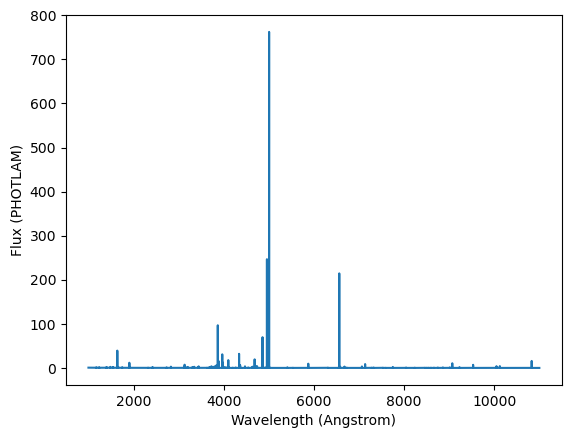

In [ ]:
sp = Spextrum("nebulae/pn")
sp.plot()

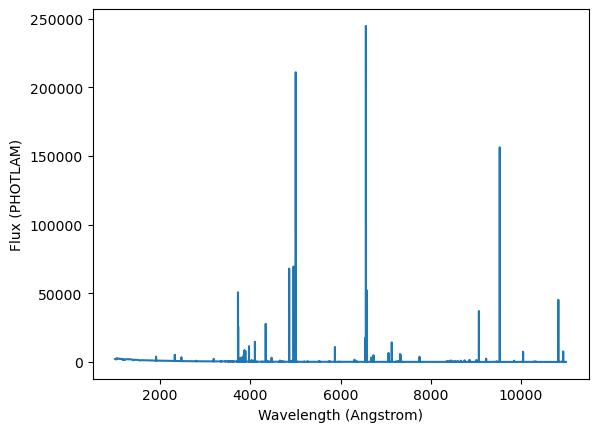

In [78]:
sp = Spextrum("nebulae/orion")
sp.plot()

100%|████████████████████████████████████████| 596k/596k [00:00<00:00, 773MB/s]


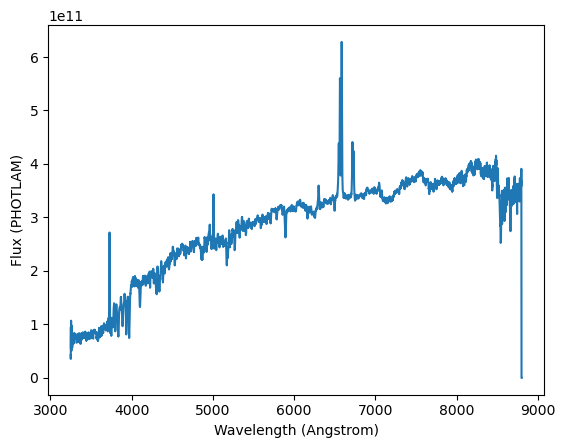

In [80]:
sp = Spextrum("dobos/l_BG")
sp.plot()